In [1]:
import yaml
import pandas as pd
import numpy as np
import gc   # For manual garbage collection

f = open(r'../python/params-oct2021-sep2022-new-equation-12212023.yaml')
parameters = yaml.safe_load(f)
f.close()

class vehicleParams():
	def __init__(self, **entries):
		self.__dict__.update(entries)

# Read only required columns for computation from trajectories df. Change this to the actual column names you use.
df = pd.read_csv(r'../../data/tidy/large/trajectories-mapped-powertrain-weight-grade-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)


df.speed = df.speed *0.44704 # Convert from mph to m/s
df.rename(columns={"speed": "Speed", "acc": "Acceleration", "VehiclWeight(lb)": "Vehicle_mass"}, inplace=True)
df = df.fillna(0)

In [8]:
avg_daily_trips = df.groupby('CalendarDate')['TripKey'].nunique().mean()
avg_daily_distance = df.groupby('CalendarDate')['dist'].sum().mean()

avg_daily_trips, avg_daily_distance

(1704.8953168044077, 9010.697702525049)

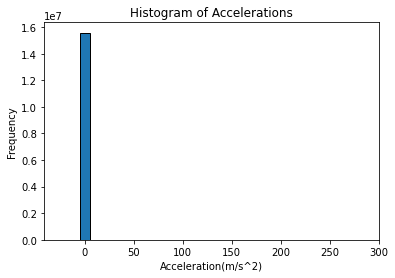

In [2]:
import matplotlib.pyplot as plt
plt.hist(df['Acceleration'], bins=30, edgecolor='black') 
plt.xlabel('Acceleration(m/s^2)')
plt.ylabel('Frequency')
plt.title('Histogram of Accelerations')
plt.show()

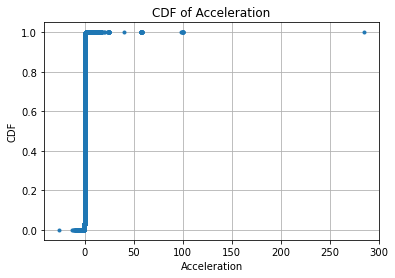

In [3]:
import matplotlib.pyplot as plt
import numpy as np

data = df['Acceleration']

# Calculate the CDF values
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)

# Create a CDF plot
plt.plot(data_sorted, cdf, marker='.', linestyle='none')
plt.xlabel('Acceleration')
plt.ylabel('CDF')
plt.title('CDF of Acceleration')
plt.grid(True)
plt.show()


In [4]:
# Calculating the 1st and 99th percentiles
quantile_1 = df['Acceleration'].quantile(0.0001)
quantile_99 = df['Acceleration'].quantile(0.9999)

# Printing only the 1st and 99th percentile values
print("quantile_1",quantile_1)
print("quantile_99",quantile_99)

quantile_1 -1.676924790528887
quantile_99 3.890559801731388


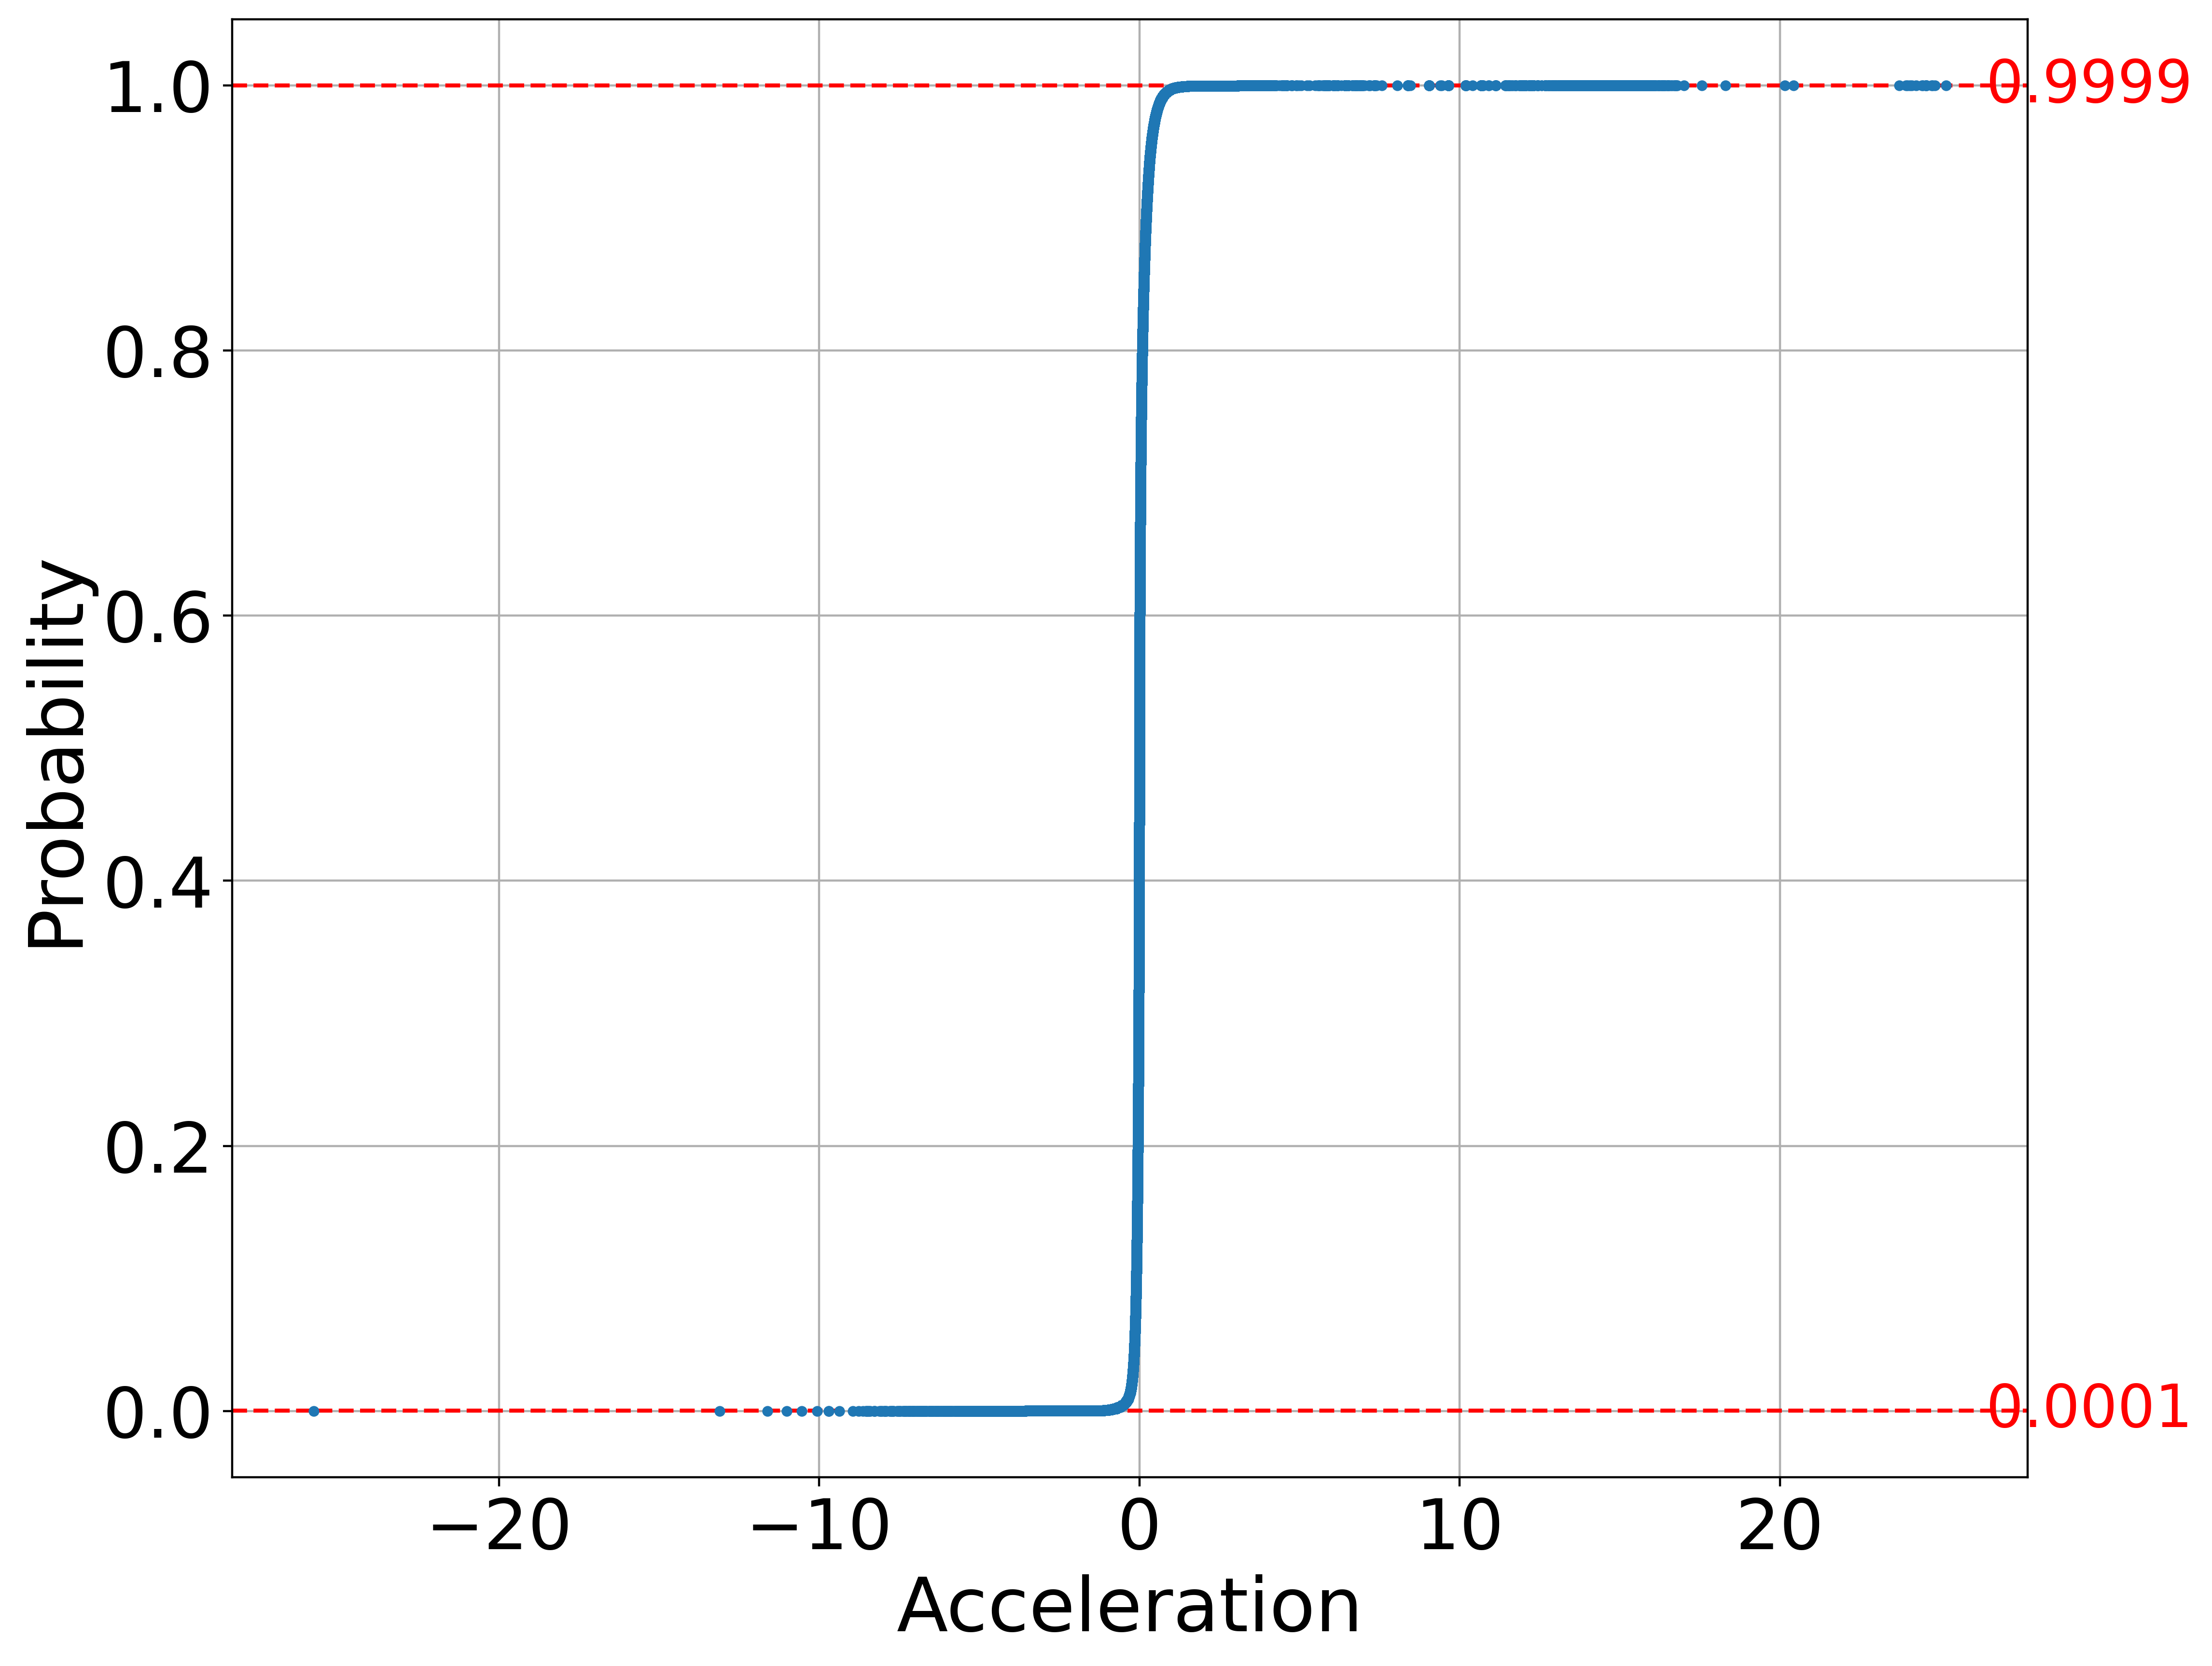

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = df['Acceleration']

# Calculate the CDF values
data_sorted = np.sort(data)
data_sorted_filtered = data_sorted[data_sorted <= 30]

cdf = np.arange(1, len(data_sorted_filtered)+1) / len(data_sorted_filtered)

plt.figure(figsize=(12, 10), dpi=400)


# Add horizontal lines at the correct CDF values for the thresholds
plt.axhline(y=0.0001, color='r', linestyle='--')  # 5% line
plt.axhline(y=0.9999, color='r', linestyle='--')  # 95% line

# Correctly position the text to label the percentiles
plt.text(max(data_sorted_filtered)*1.05, 0.0001, '0.0001', verticalalignment='center', color='r', fontsize=22)
plt.text(max(data_sorted_filtered)*1.05, 0.9999, '0.9999', verticalalignment='center', color='r', fontsize=22)

# Create a CDF plot
plt.plot(data_sorted_filtered, cdf, marker='.', linestyle='none')
plt.xlabel('Acceleration', fontsize=28)
plt.ylabel('Probability', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(True)
plt.show()


In [6]:
df.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Vehicle', 'VehicleType', 'SeatedCap',
       'TotalCap', 'Lat', 'Lon', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Daytype', 'Hour', 'Minute', 'Second', 'Date', 'Powertrain',
       'VehicleModel', 'Vehicle_mass', 'time_delta_in_seconds', 'dist',
       'Speed', 'Acceleration', 'elevation', 'grade'],
      dtype='object')

In [7]:
df['Powertrain'].unique()

array(['conventional', 'electric', 'hybrid'], dtype=object)

In [8]:
df_cdb=df.loc[df['Powertrain']=='conventional']
df_heb=df.loc[df['Powertrain']=='hybrid']
df_beb=df.loc[df['Powertrain']=='electric']

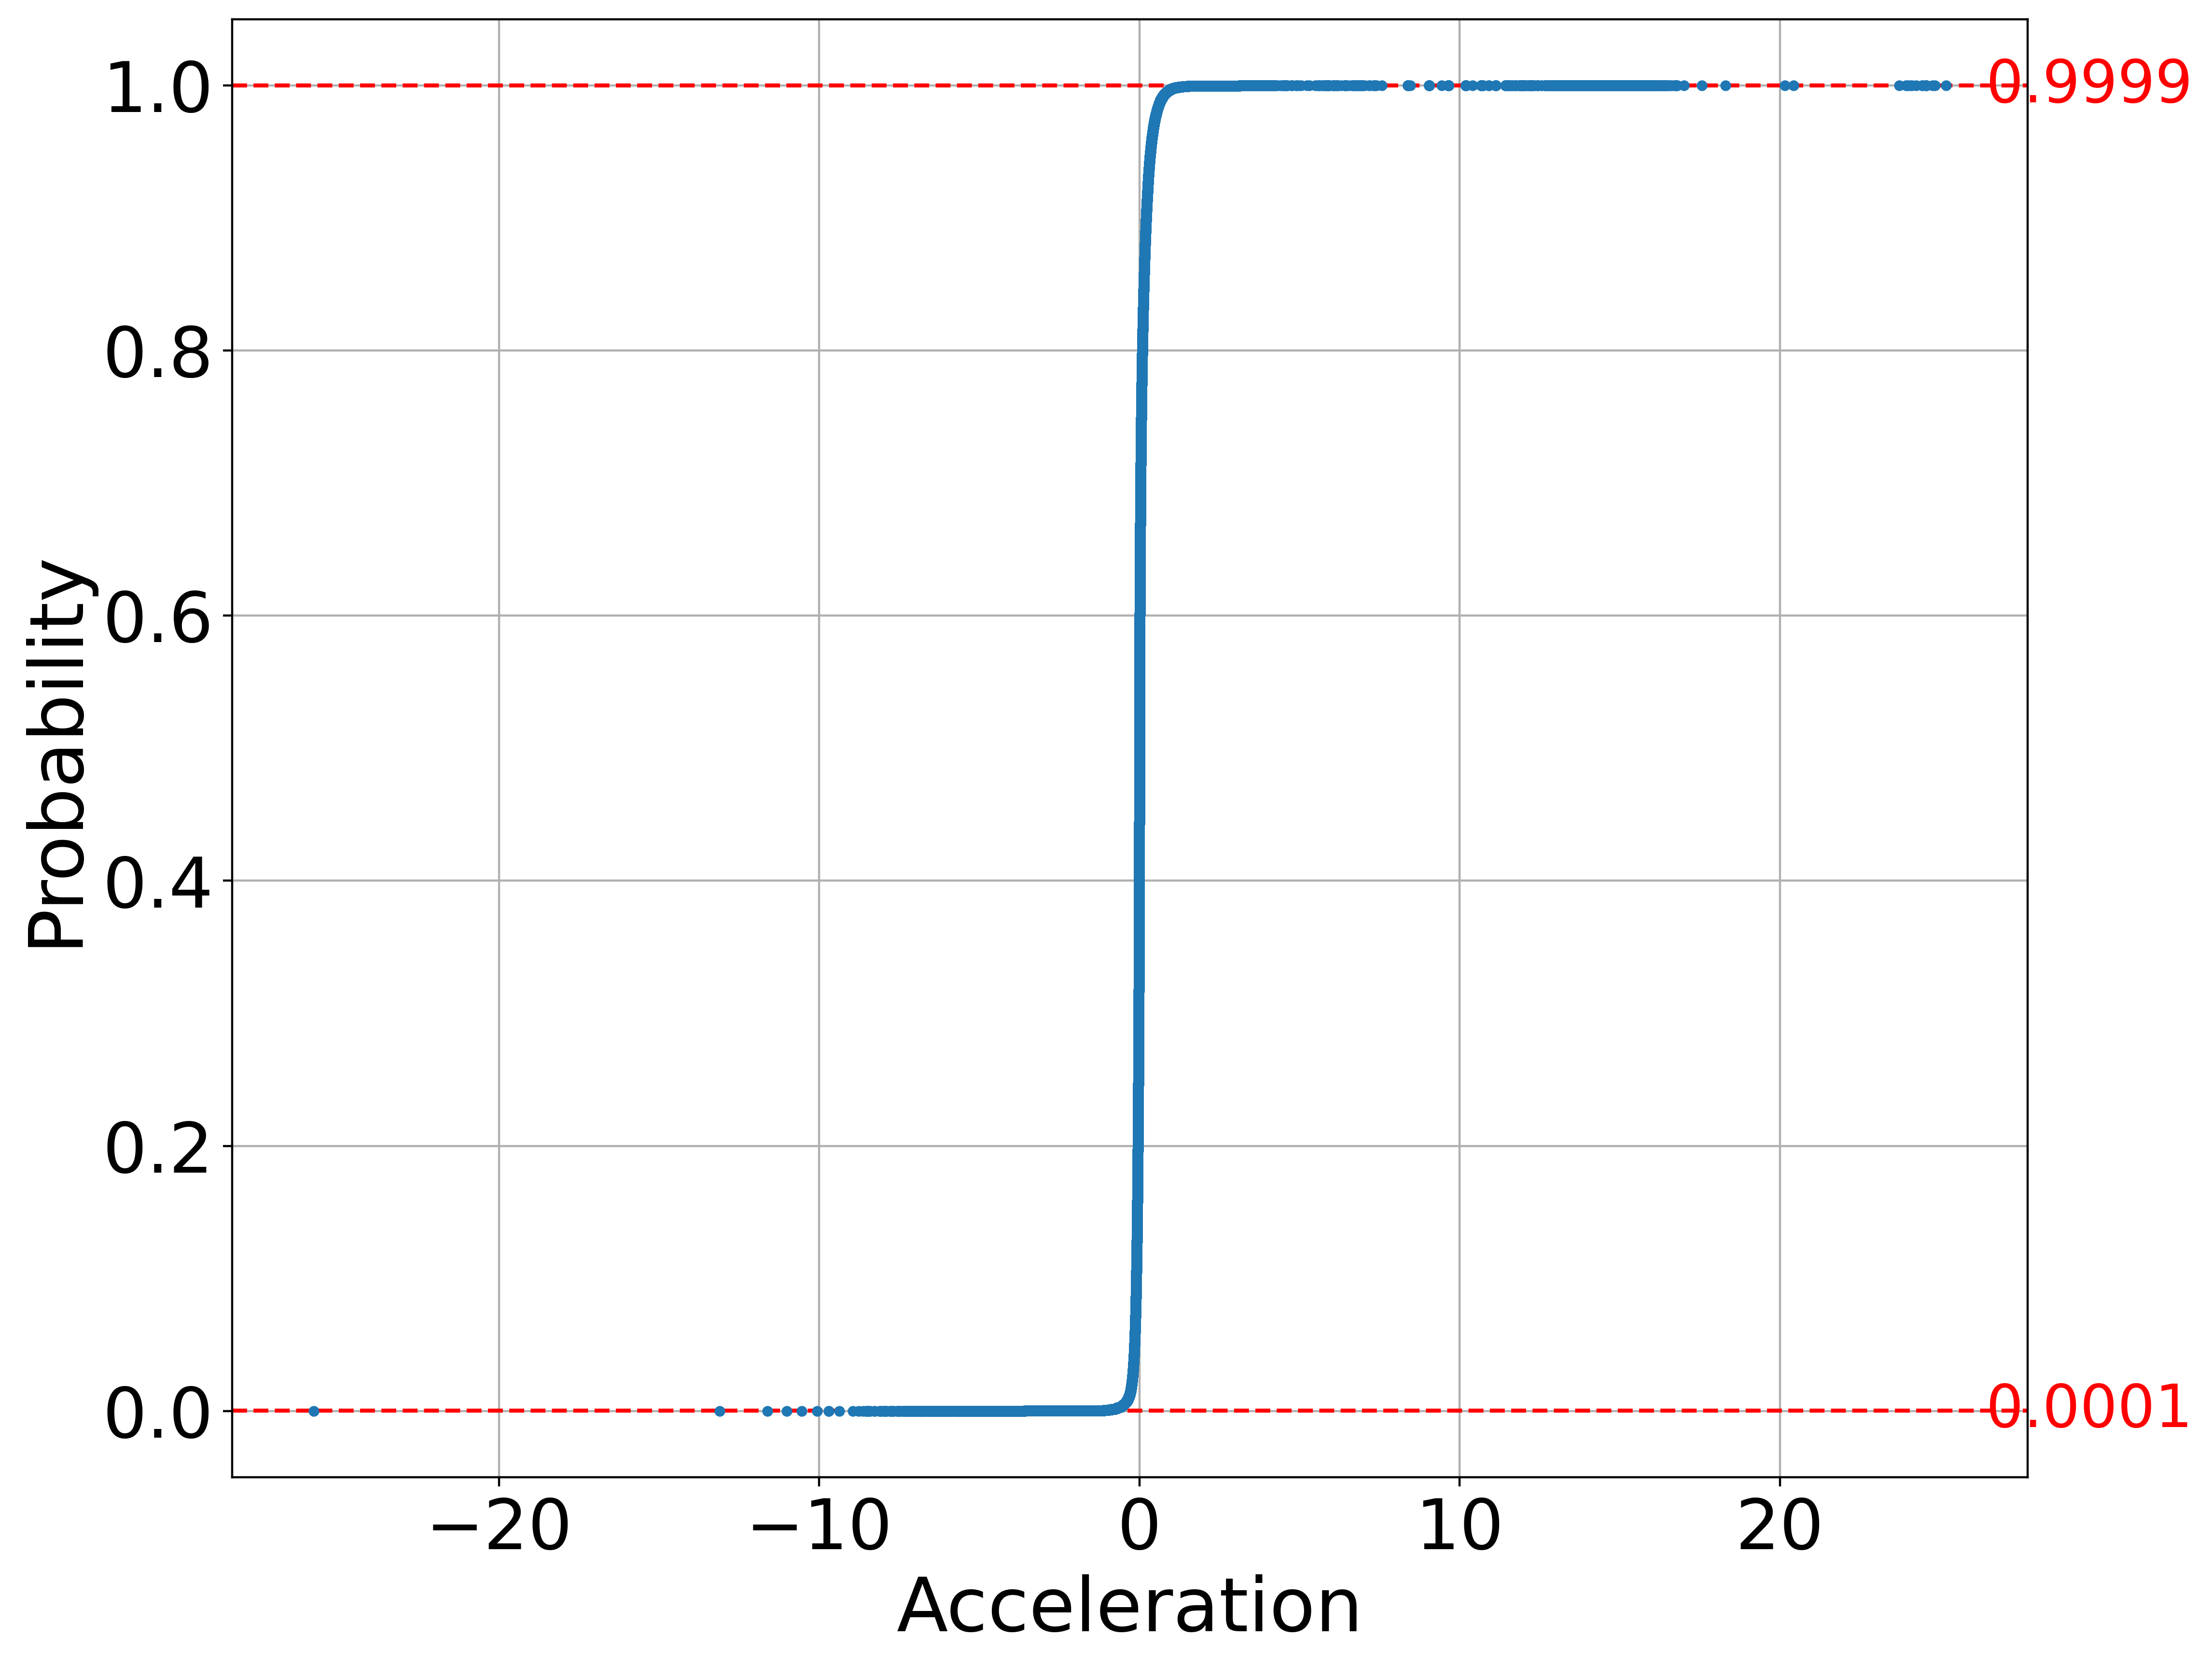

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = df_cdb['Acceleration']

# Calculate the CDF values
data_sorted = np.sort(data)
data_sorted_filtered = data_sorted[data_sorted <= 30]

cdf = np.arange(1, len(data_sorted_filtered)+1) / len(data_sorted_filtered)

plt.figure(figsize=(12, 10), dpi=400)


# Add horizontal lines at the correct CDF values for the thresholds
plt.axhline(y=0.0001, color='r', linestyle='--')  # 5% line
plt.axhline(y=0.9999, color='r', linestyle='--')  # 95% line

# Correctly position the text to label the percentiles
plt.text(max(data_sorted_filtered)*1.05, 0.0001, '0.0001', verticalalignment='center', color='r', fontsize=22)
plt.text(max(data_sorted_filtered)*1.05, 0.9999, '0.9999', verticalalignment='center', color='r', fontsize=22)

# Create a CDF plot
plt.plot(data_sorted_filtered, cdf, marker='.', linestyle='none')
plt.xlabel('Acceleration', fontsize=28)
plt.ylabel('Probability', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(True)
plt.show()


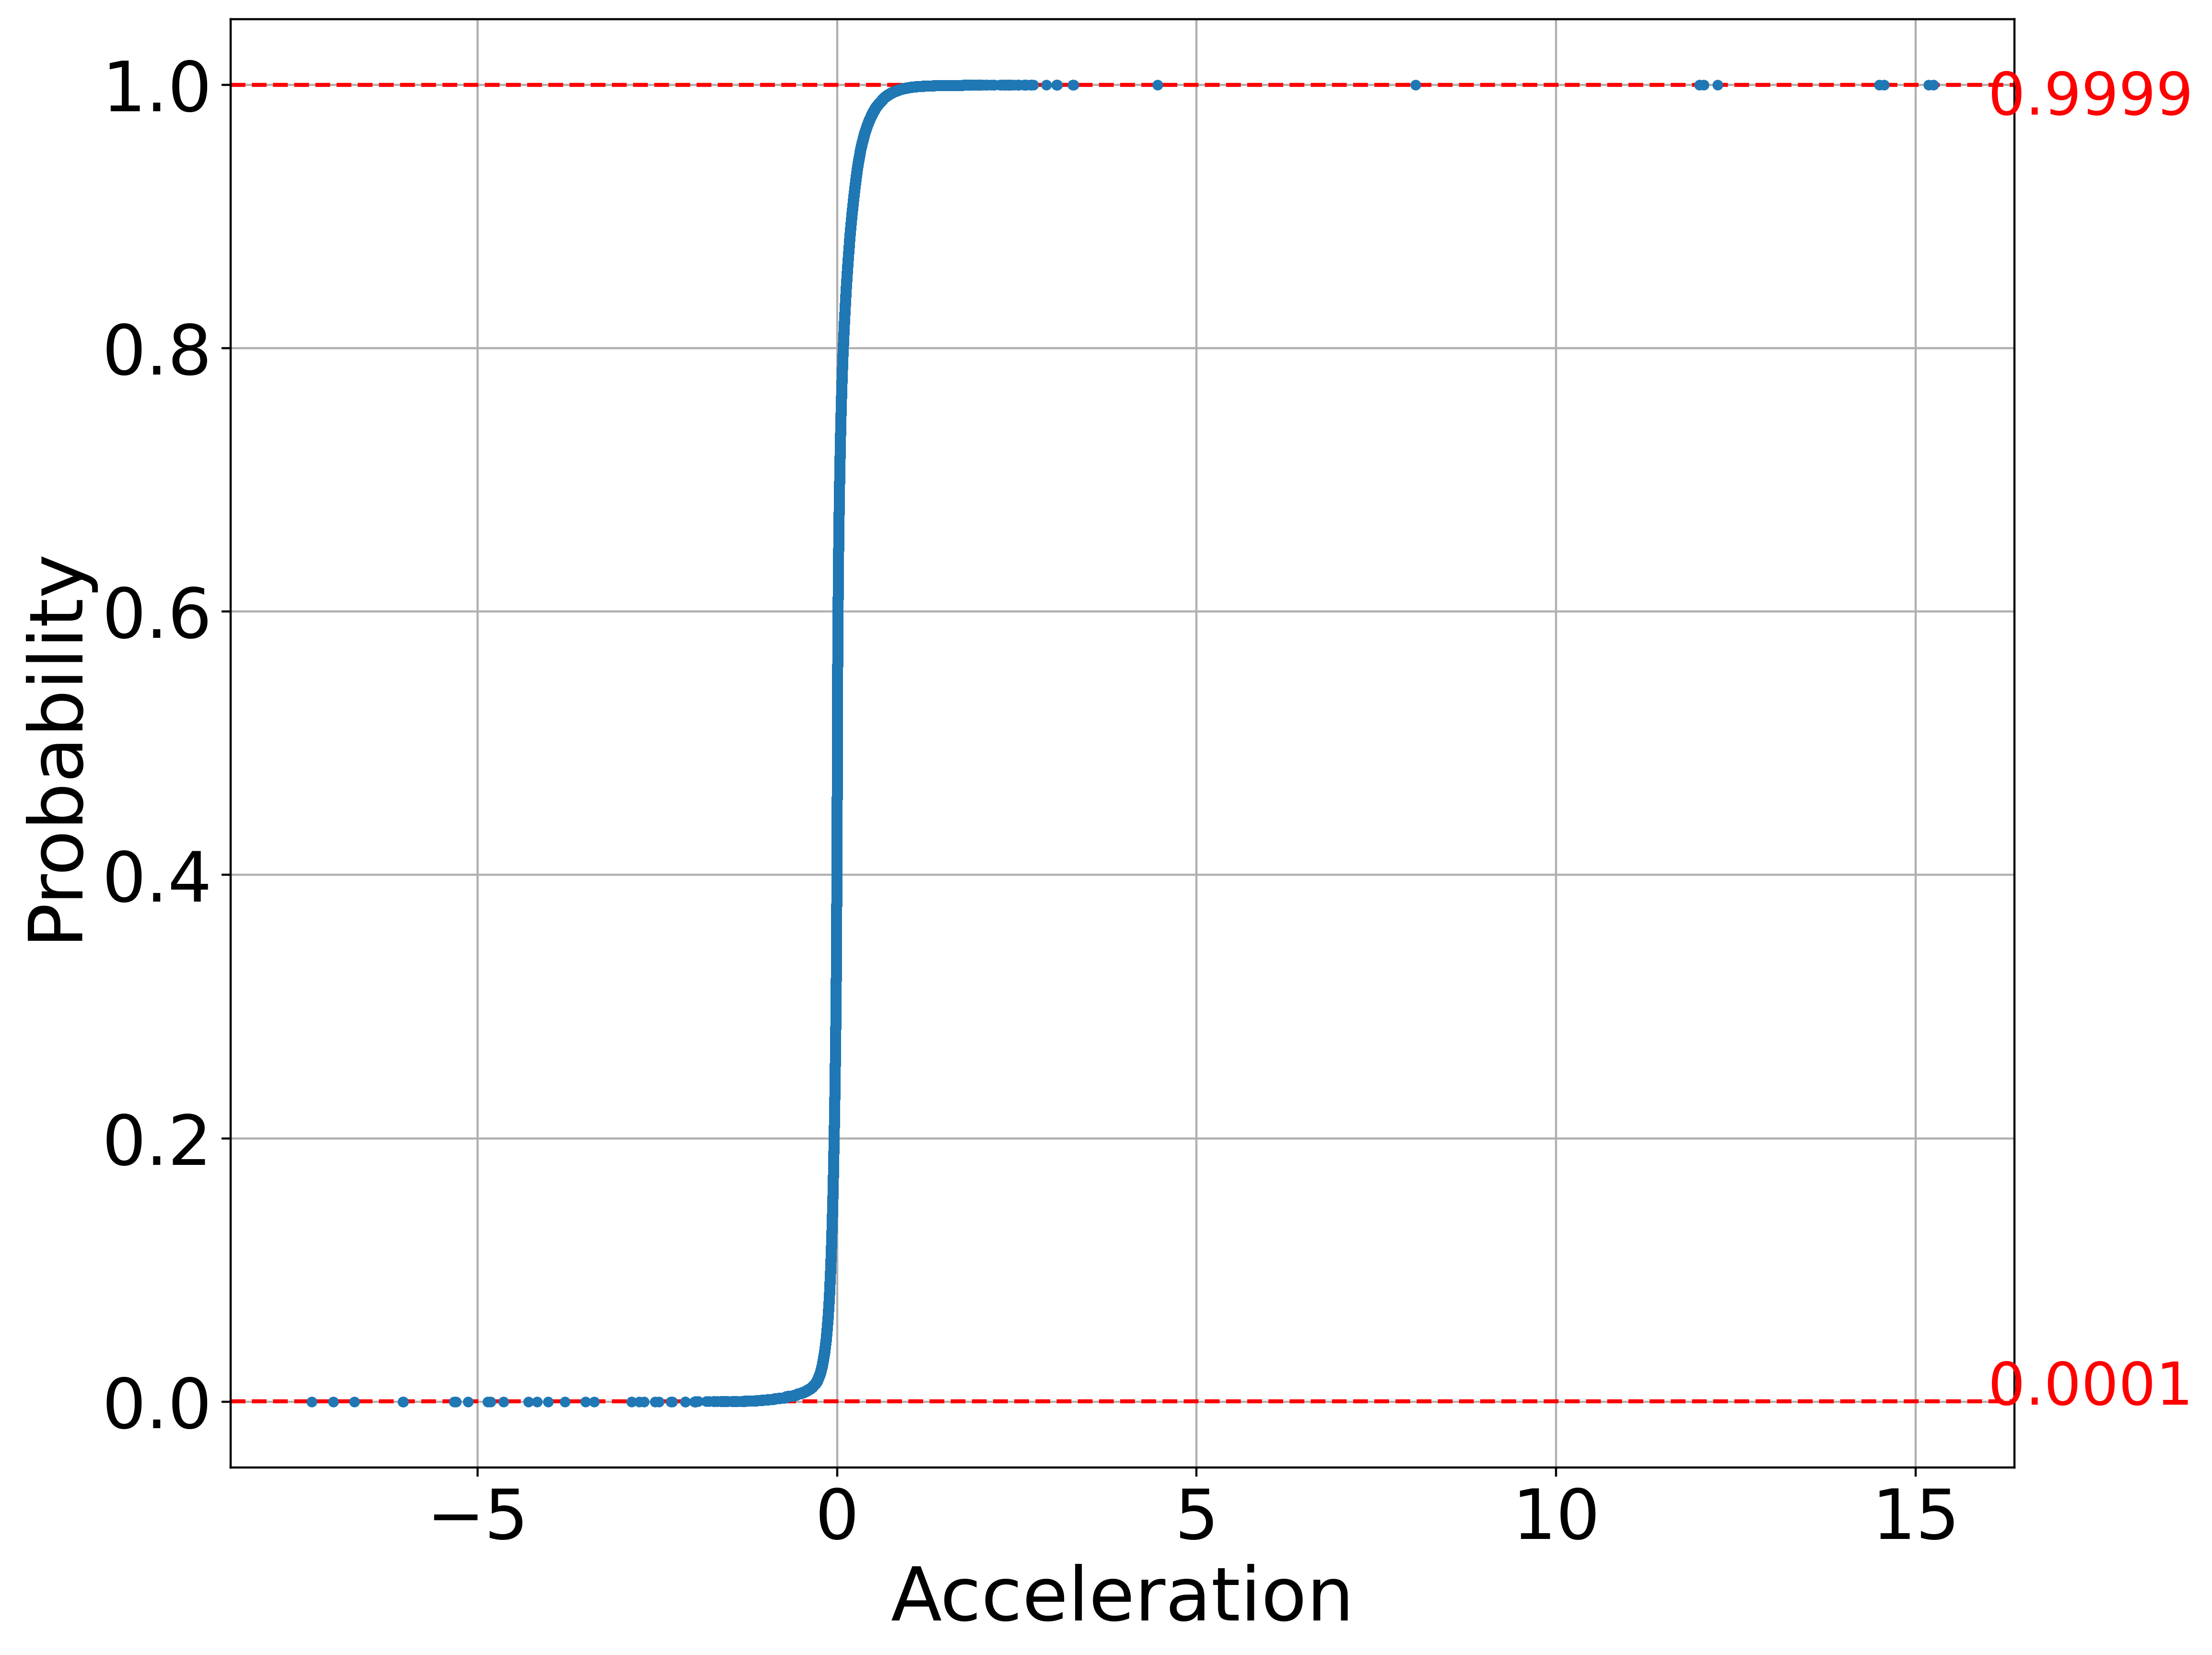

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = df_heb['Acceleration']

# Calculate the CDF values
data_sorted = np.sort(data)
data_sorted_filtered = data_sorted[data_sorted <= 30]

cdf = np.arange(1, len(data_sorted_filtered)+1) / len(data_sorted_filtered)

plt.figure(figsize=(12, 10), dpi=400)


# Add horizontal lines at the correct CDF values for the thresholds
plt.axhline(y=0.0001, color='r', linestyle='--')  # 5% line
plt.axhline(y=0.9999, color='r', linestyle='--')  # 95% line

# Correctly position the text to label the percentiles
plt.text(max(data_sorted_filtered)*1.05, 0.01, '0.0001', verticalalignment='center', color='r', fontsize=22)
plt.text(max(data_sorted_filtered)*1.05, 0.99, '0.9999', verticalalignment='center', color='r', fontsize=22)

# Create a CDF plot
plt.plot(data_sorted_filtered, cdf, marker='.', linestyle='none')
plt.xlabel('Acceleration', fontsize=28)
plt.ylabel('Probability', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(True)
plt.show()


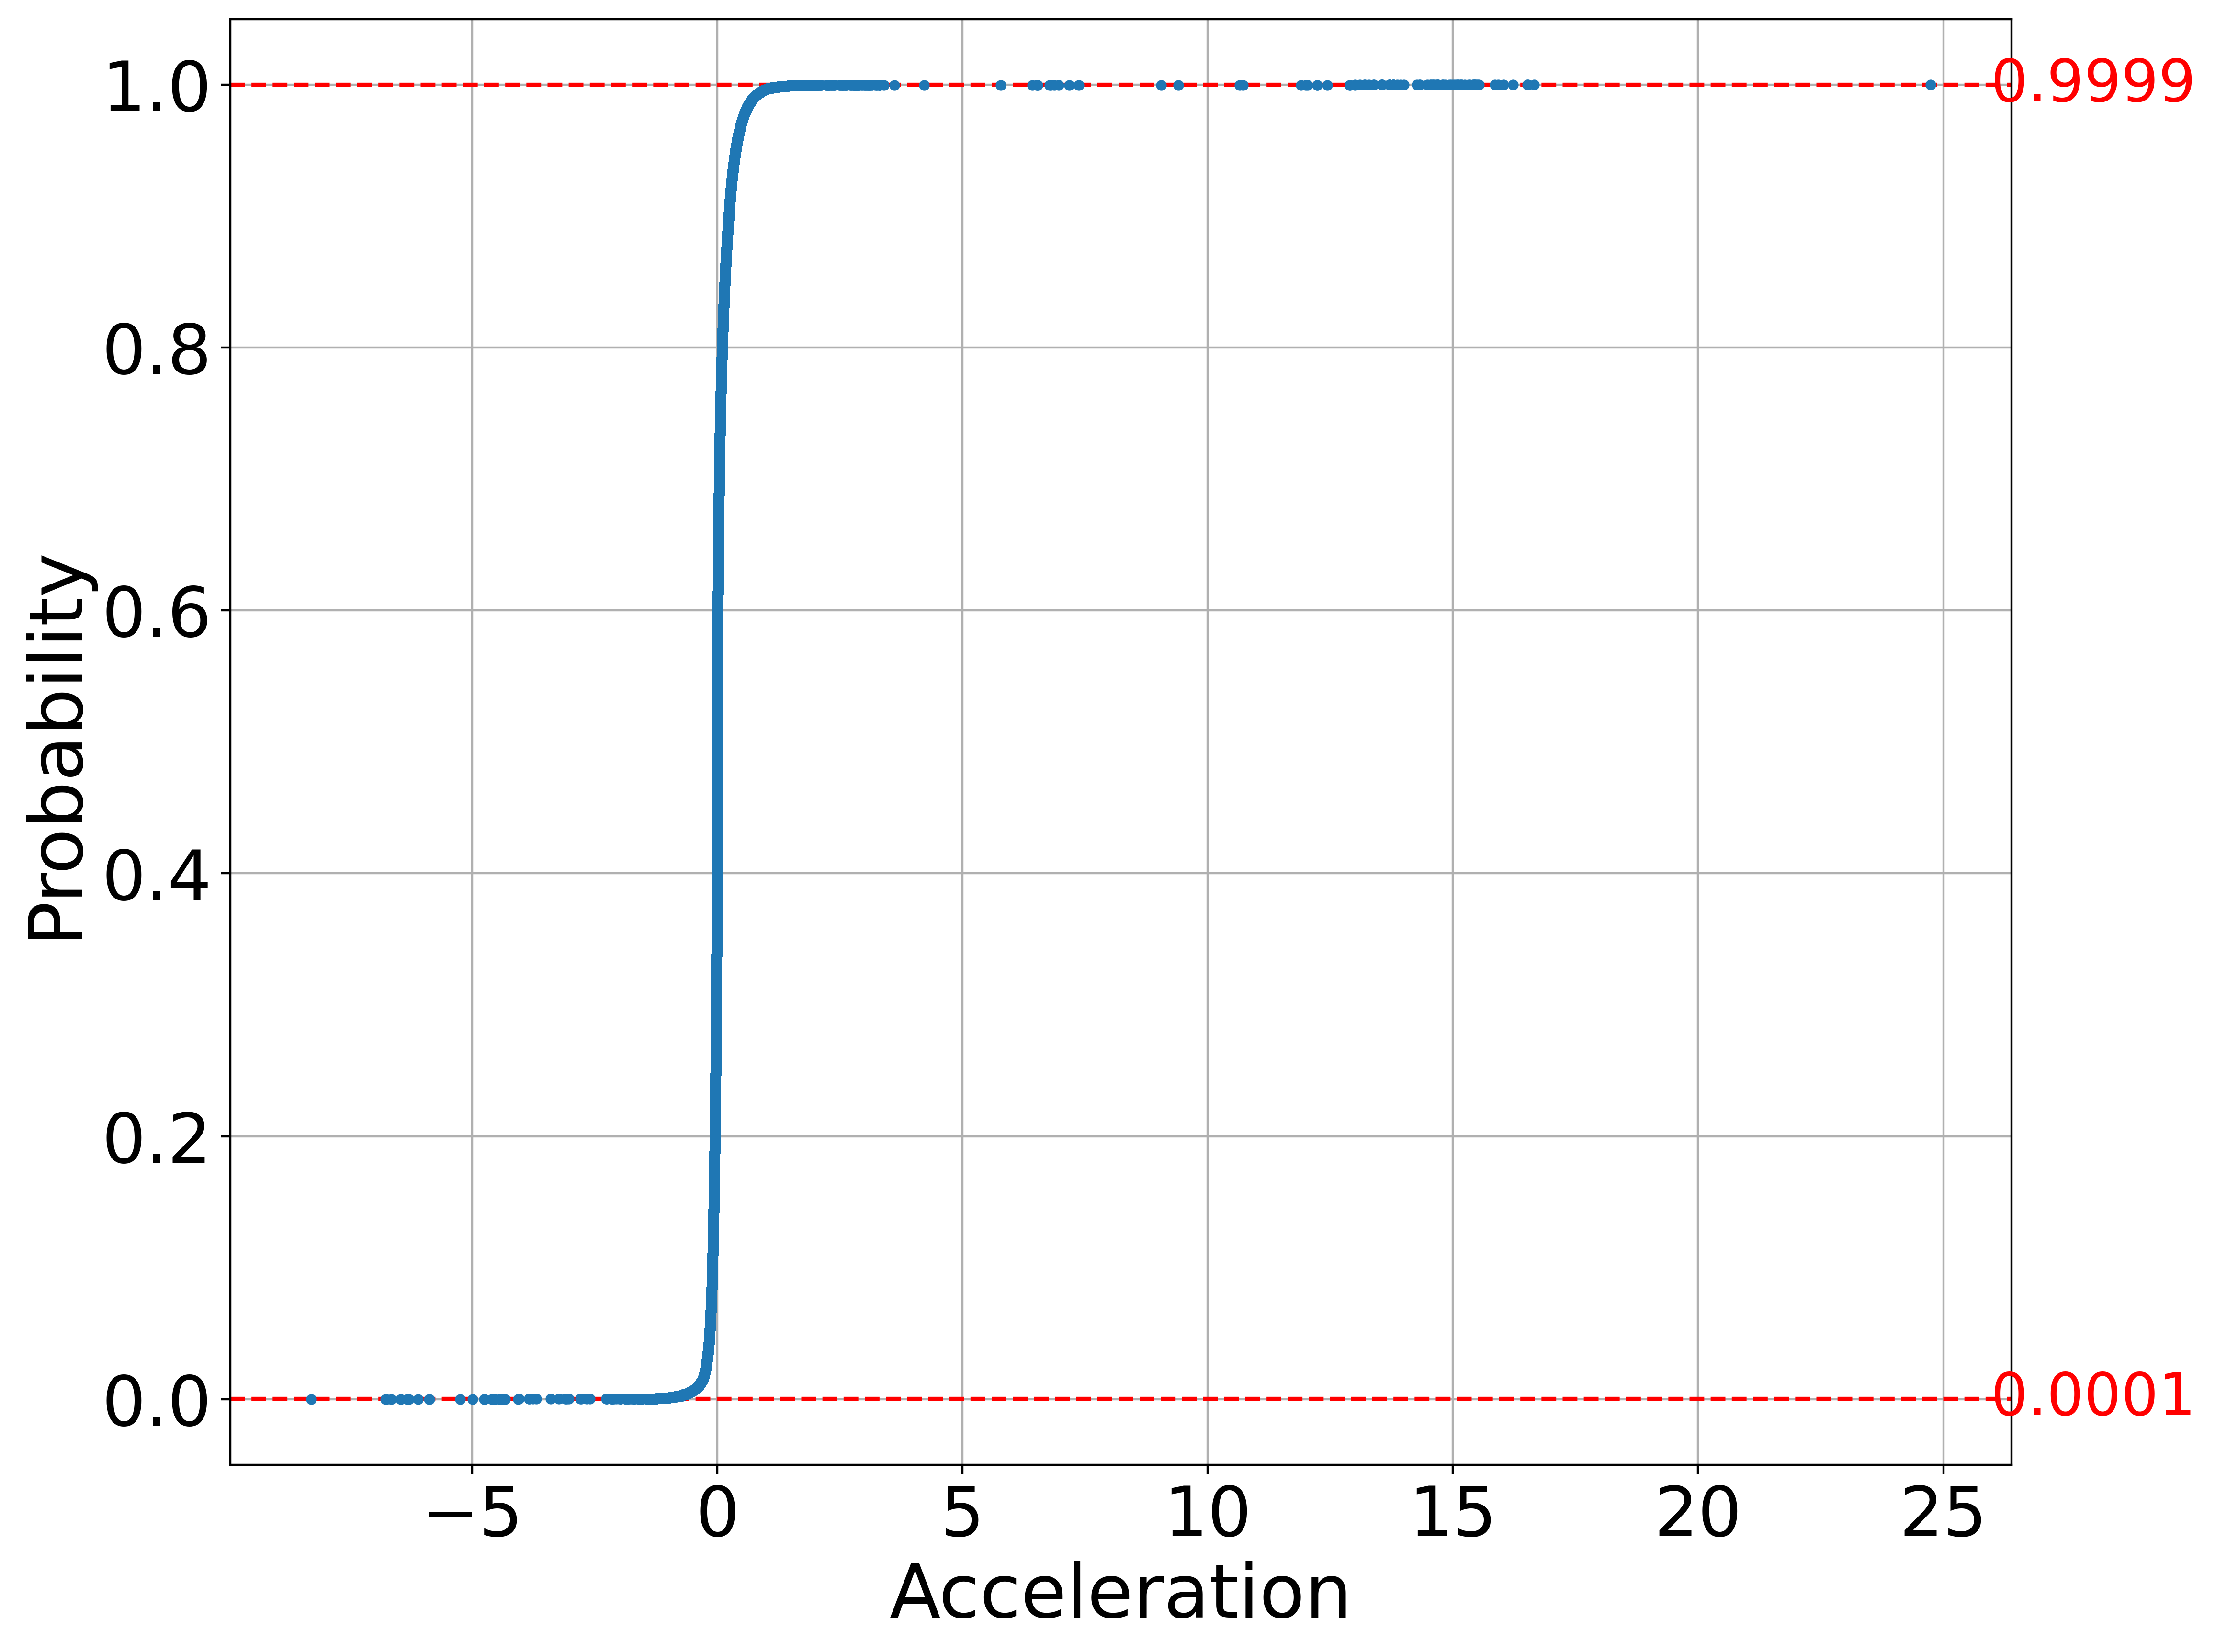

In [11]:
import matplotlib.pyplot as plt
import numpy as np

data = df_beb['Acceleration']

# Calculate the CDF values
data_sorted = np.sort(data)
data_sorted_filtered = data_sorted[data_sorted <= 30]

cdf = np.arange(1, len(data_sorted_filtered)+1) / len(data_sorted_filtered)

plt.figure(figsize=(12, 10), dpi=400)


# Add horizontal lines at the correct CDF values for the thresholds
plt.axhline(y=0.0001, color='r', linestyle='--')  # 5% line
plt.axhline(y=0.9999, color='r', linestyle='--')  # 95% line

# Correctly position the text to label the percentiles
plt.text(max(data_sorted_filtered)*1.05, 0.0001, '0.0001', verticalalignment='center', color='r', fontsize=22)
plt.text(max(data_sorted_filtered)*1.05, 0.9999, '0.9999', verticalalignment='center', color='r', fontsize=22)

# Create a CDF plot
plt.plot(data_sorted_filtered, cdf, marker='.', linestyle='none')
plt.xlabel('Acceleration', fontsize=28)
plt.ylabel('Probability', fontsize=28)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(True)
plt.show()
